# Analiza vin

V zvezku so predstavljeni rezultati analize podatkov s strani Wine Library.

## Uvoz in predobdelava

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
vina = pd.read_csv('obdelani_podatki/vina.csv')
detajli = pd.read_csv('obdelani_podatki/detajli.csv')
okusi = pd.read_csv('obdelani_podatki/okusi.csv')
vonjave = pd.read_csv('obdelani_podatki/vonjave.csv')

In [3]:
# tabela master je največja - vsebuje vse naše podatke
senses = pd.merge(okusi, vonjave)
vina_senses = pd.merge(vina, senses)
master = pd.merge(vina_senses, detajli)
master

,id,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,okus,vonj,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
0,119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,violet,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
1,119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,rose,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
2,119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,petal,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
3,119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,oak,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
4,119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,cherry,smoke,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341452,115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,blackberry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
341453,115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cherry,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
341454,115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cedar,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425
341455,115878,2016.0,Casa Piena Cabernet Sauvignon,Cabernet Sauvignon,United States,750,139.99,174.99,96.0,Antonio Galloni - Vinous,vanilla,cigar,California,Napa,Red,14.7,Cork,2016 was a particularly giving vintage for Cas...,Casa Piena's 2016 Cabernet Sauvignon has turne...,1425


In [101]:
# ker se v master vina ponavljajo, naredimo še tabelo brez okusov in vonjav, 
# ki je bolj sprejemljive velikosti
vina = pd.merge(vina, detajli).set_index('id')
vina

,leto,ime,sorta,drzava,velikost,znizana_cena,cena,ocena,ocenjevalec,regija,podregija,barva,alkohol,zamasek,opis,recenzija,popularnost
id,,,,,,,,,,,,,,,,,
119920,2019.0,Julien Sunier Regnie,Gamay,France,750,28.99,35.99,NaN,NaN,Beaujolais,Beaujolais Cru,Red,NaN,Cork,"This Beaujolais’ cru, often underestimated, do...",NaN,1426
118777,2019.0,Vina Gonzalez Bastias Naranjo Valle De Maule (...,Blend,Chile,750,29.99,34.99,NaN,NaN,Central Valley,Maule,Orange,13.0,Cork,"A blend of Moscatel, Torrontel and País. The M...",NaN,1427
119906,2019.0,Izadi Rioja Bianco,Blend,Spain,750,19.99,25.00,NaN,NaN,La Rioja,Rioja,White,13.5,Cork,Straw yellow in colour with bright green tones...,NaN,1428
114983,2016.0,Lamy Pillot Morgeot Chassagne Montrachet,Pinot Noir,France,750,44.99,60.00,NaN,NaN,Burgundy,Chassagne Montrachet,Red,13.0,Cork,A wine as good as many 1er crus from their nei...,NaN,1429
118255,2018.0,Jules Pierre Macon Villages,Chardonnay,France,750,19.99,25.00,NaN,NaN,Burgundy,Macon-Villages,White,12.5,Cork,Fresh and fruit-driven white wine capturing th...,NaN,1430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112603,2017.0,Giraud Les Grenaches De Pierre Chateauneuf Du ...,Grenache / Garnacha,France,750,99.99,162.99,96.0,Joe Czerwinski - Robert Parker&#39;s Wine Advo...,Rhone,Chateauneuf du Pape,Red,15.5,Cork,NaN,"Full-bodied yet silky, elegant and positively ...",1421
112025,2015.0,Philippe Gimel St Jean Du Barroux L'argile,Blend,France,750,26.80,34.99,93.0,Jeb Dunnuck - jebdunnuck.com,Rhone,Cotes du Ventoux,Red,14.5,Cork,NaN,"The 2015 L'Argile spent 24 months in concrete,...",1422
118326,2017.0,Pichler Krutzler Klostersatz Gruner Veltliner,Gruner Veltliner,Austria,750,27.99,35.00,92.0,Wine Enthusiast,Niederosterreich-Lower Austria,Wachau,White,12.5,Screwtop,Pichler-Krutzler from Austria’s famed Wachau r...,Reduction and yeast vie for attention with rou...,1423


## Analiza

Za začetek si enostavno poglejmo, ali ljudje preferirajo belo ali rdeče vino:

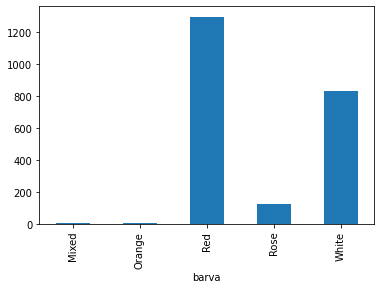

In [52]:
# količina vin posamezne barve
vina.groupby('barva').count()['popularnost'].plot.bar();

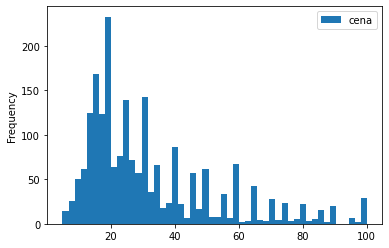

In [77]:
# popularsnost cen (pod 100)
vina[vina.cena <= 100].plot.hist(y='cena', bins=50);

<AxesSubplot:xlabel='cena', ylabel='popularnost'>

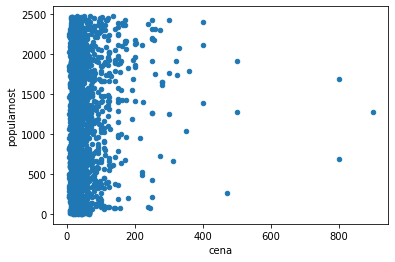

In [81]:
# popularnost v odvisnosti od cene
vina.plot.scatter(x='cena', y='popularnost')

<AxesSubplot:xlabel='ocena', ylabel='popularnost'>

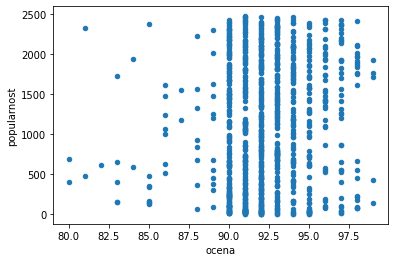

In [83]:
vina[vina.ocena >= 70].plot.scatter(x='ocena', y='popularnost')

In [93]:
def koren_besede(beseda):
    beseda = ''.join(znak for znak in beseda if znak.isalpha())
    if not beseda:
        return '$'
    konec = len(beseda) - 1
    if beseda[konec] in 'ds':
        konec -= 1
    while konec >= 0 and beseda[konec] in 'aeiou':
        konec -= 1
    return beseda[:konec + 1]

def koreni_besed(niz):
    niz = str(niz)
    return pd.Series(sorted({
        koren_besede(beseda) for beseda in niz.replace('-', ' ').lower().split() if beseda
    }))

In [86]:
verjetnosti_barv = vina.groupby('barva').size() / len(vina)
verjetnosti_barv.sort_values()

barva
Mixed     0.001325
Orange    0.002649
Rose      0.056071
White     0.367329
Red       0.572627
dtype: float64

In [110]:
koreni_vin = vina.opis.apply(
    koreni_besed
).stack(
).reset_index(
    level='id'
).rename(columns={
    'id': 'vino',
    0: 'koren',
})
koreni_vin

,vino,koren
0,119920,
1,119920,alluvium
2,119920,an
3,119920,ancient
4,119920,appreciat
...,...,...
103,115878,win
104,115878,winemaker
105,115878,with
106,115878,year


In [116]:
koreni_barv = pd.merge(koreni_vin, vina.barva, left_on='vino', right_on='id')[['koren', 'barva']]
koreni_barv

,koren,barva
0,,Red
1,alluvium,Red
2,an,Red
3,ancient,Red
4,appreciat,Red
...,...,...
116875,win,Red
116876,winemaker,Red
116877,with,Red
116878,year,Red


In [118]:
pojavitve_korenov_po_barvah = pd.crosstab(koreni_barv.koren, koreni_barv.barva)
pojavitve_korenov_po_barvah

barva,Mixed,Orange,Red,Rose,White
koren,,,,,
,3,6,1077,115,736
$,3,3,520,41,324
abandon,0,0,0,0,1
abarbanel,0,0,1,0,0
abbey,0,0,1,0,1
...,...,...,...,...,...
ﬁzzy,0,0,1,0,0
ﬂ,0,0,0,0,1
ﬂavor,0,0,1,0,0


In [121]:
verjetnosti_korenov_po_barvah = pojavitve_korenov_po_barvah / vina.groupby('barva').size() + 0.001
verjetnosti_korenov_po_barvah

barva,Mixed,Orange,Red,Rose,White
koren,,,,,
,1.001,1.001,0.831378,0.906512,0.885615
$,1.001,0.501,0.401925,0.323835,0.390423
abandon,0.001,0.001,0.001000,0.001000,0.002202
abarbanel,0.001,0.001,0.001771,0.001000,0.001000
abbey,0.001,0.001,0.001771,0.001000,0.002202
...,...,...,...,...,...
ﬁzzy,0.001,0.001,0.001771,0.001000,0.001000
ﬂ,0.001,0.001,0.001000,0.001000,0.002202
ﬂavor,0.001,0.001,0.001771,0.001000,0.001000


In [123]:
verjetnosti_korenov_po_barvah.Red.sort_values(ascending=False).head(20)

koren
an        0.843714
          0.831378
th        0.802850
of        0.788972
with      0.673321
win       0.591594
in        0.550730
t         0.492133
winery    0.475171
fruit     0.419658
$         0.401925
on        0.401154
it        0.400383
r         0.358749
from      0.344870
for       0.341786
tannin    0.310175
that      0.309404
not       0.305549
ar        0.283961
Name: Red, dtype: float64

In [125]:
def doloci_zanre(opis):
    faktorji_barv = verjetnosti_barv * verjetnosti_korenov_po_barvah[
        verjetnosti_korenov_po_barvah.index.isin(
            koreni_besed(opis)
        )
    ].prod()
    faktorji_barv /= max(faktorji_barv)
    return faktorji_barv.sort_values(ascending=False).head(5)

In [133]:
doloci_zanre('A mellow texture with an extraordinary colour')

barva
Red       1.000000e+00
White     2.236370e-01
Rose      1.991377e-03
Orange    7.281195e-06
Mixed     1.448277e-08
dtype: float64